In [1]:
import numpy as np
import matplotlib.pyplot as plt

Potential with `Rotation` (yz term) and `Squeeze` ($y^2-z^2$ term):
$$
\Phi = a(y^2+z^2)+2byz+c(y^2-z^2)
$$
Diagnalize this function we can get the eigenvalues (mode frequency) and eigenvectors (rotated axis):

Eigenvalues:
$$
\omega_1^2 = a-\sqrt{b^2+c^2}\\
\omega_2^2 = a+\sqrt{b^2+c^2}
$$
Eigenvectors:
$$
v_1 = \{\frac{c-\sqrt{b^2+c^2}}{b}, 1\}\\
v_2 = \{\frac{c+\sqrt{b^2+c^2}}{b}, 1\}
$$

In [2]:
import pandas as pd
data_rot = pd.read_excel('data20240222.xlsx', sheet_name='Sheet2')
data_rot

,Squeeze,freq1,freq2,radial freq1,radial freq2
0,-0.8,207.6500,207.9078,1.878004,1.620204
1,-0.7,207.6640,207.8937,1.864004,1.634304
2,-0.6,207.6800,207.8864,1.848004,1.641604
3,-0.5,207.6970,207.8768,1.831004,1.651204
4,-0.4,207.7155,207.8750,1.812504,1.653004
5,-0.3,207.6920,207.8850,1.836004,1.643004
6,-0.2,207.7200,NaN,1.808004,NaN
7,-0.1,207.7390,207.8470,1.789004,1.681004
8,0.0,207.7440,NaN,1.784004,NaN
9,0.1,207.7620,207.8890,1.766004,1.639004


In [3]:
data_rot.keys()

Index(['Squeeze', 'freq1', 'freq2', 'radial freq1', 'radial freq2'], dtype='object')

In [4]:
## Red chamber
from math import isnan
c_list = [float(data_rot['Squeeze'][i]) for i in range(len(data_rot))]
w1_dt = [float(data_rot['radial freq1'][i]) for i in range(len(data_rot))]
w2_dt = [float(data_rot['radial freq2'][i]) for i in range(len(data_rot))]
w_sec = [np.sqrt((w1_dt[i]**2+w2_dt[i]**2-0.3**2)/2) for i in range(len(data_rot))]

from math import isnan
w_sec_nonan = []
for w in w_sec:
    if not isnan(w):
        w_sec_nonan.append(w)
a = np.mean(w_sec_nonan)**2 # secular freq
a = a

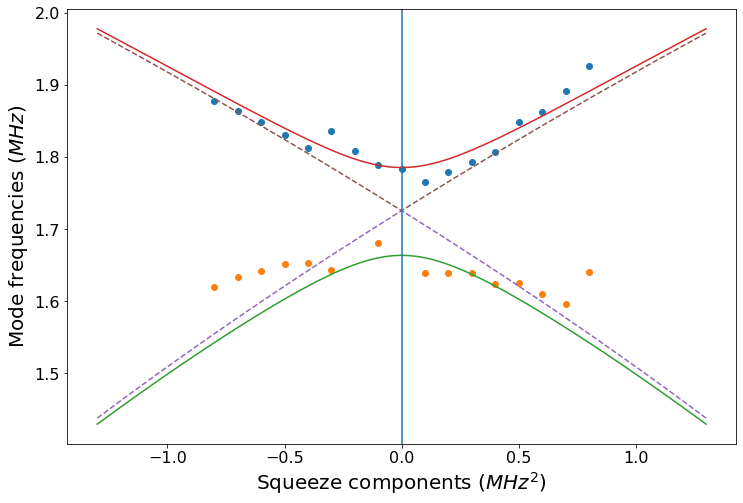

Text(0, 0.5, 'Theta')

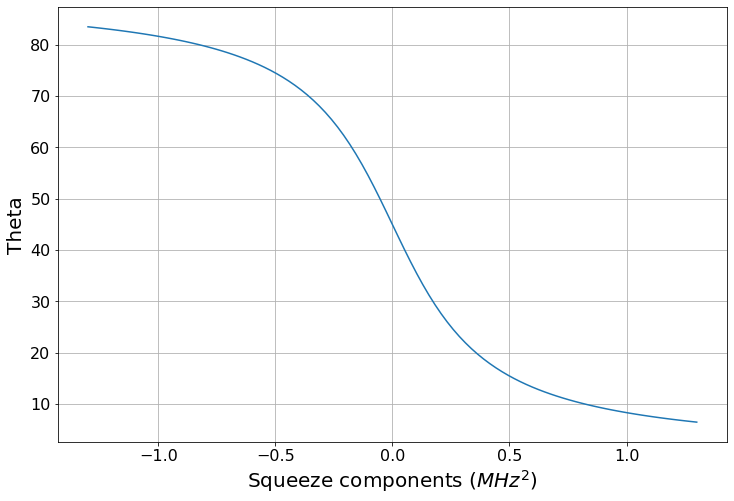

In [5]:
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## For Red chamber, we want the axis is 45 degree, so we apply the rotation and want the squeeze to be zero.
b = 0.3
offset = 0
slope = 0.7
c_ls = np.linspace(-1.3, 1.3, 101)
w1_0 = []
w2_0 = []
w1 = []
w2 = []
theta = [] 
for c in c_ls:
    w1_0.append(np.sqrt(a-slope*np.sqrt((c-offset)**2)))
    w2_0.append(np.sqrt(a+slope*np.sqrt((c-offset)**2)))
    w1.append(np.sqrt(a-slope*np.sqrt((c-offset)**2+b**2)))
    w2.append(np.sqrt(a+slope*np.sqrt((c-offset)**2+b**2)))
    theta.append(np.arctan(b/(c+np.sqrt(b**2+c**2)))*180/np.pi)
plt.figure(figsize = (12,8))
plt.plot(c_list, w1_dt,'o', label = r'Measured $\omega_1$')
plt.plot(c_list, w2_dt,'o', label = r'Measured $\omega_2$')
plt.plot(c_ls, w1, label = r'$\omega_1$ with 0.2MHz rotation')
plt.plot(c_ls, w2, label = r'$\omega_2$ with 0.2MHz rotation')
plt.plot(c_ls, w1_0, '--', label = r'$\omega_1$ no rotation')
plt.plot(c_ls, w2_0, '--', label = r'$\omega_2$ no rotation')
plt.axvline(x = 0)
plt.xlabel(r'Squeeze components ($MHz^2$)')
plt.ylabel(r'Mode frequencies ($MHz$)')
# plt.legend()
plt.show()
plt.figure(figsize = (12,8))
plt.plot(c_ls, theta)
plt.grid()
plt.xlabel(r'Squeeze components ($MHz^2$)')
plt.ylabel(r'Theta')